d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Users\epiph\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


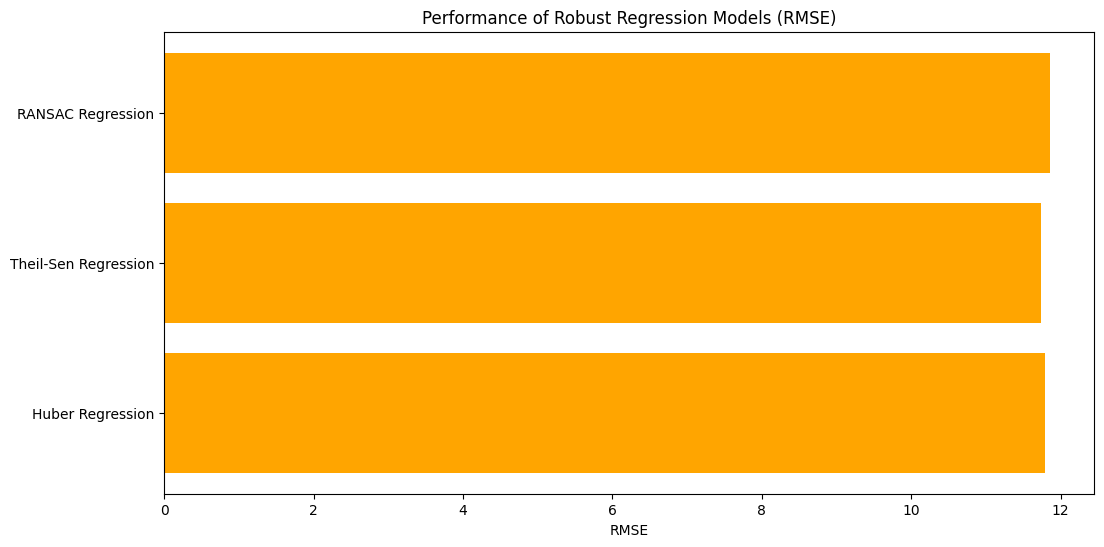

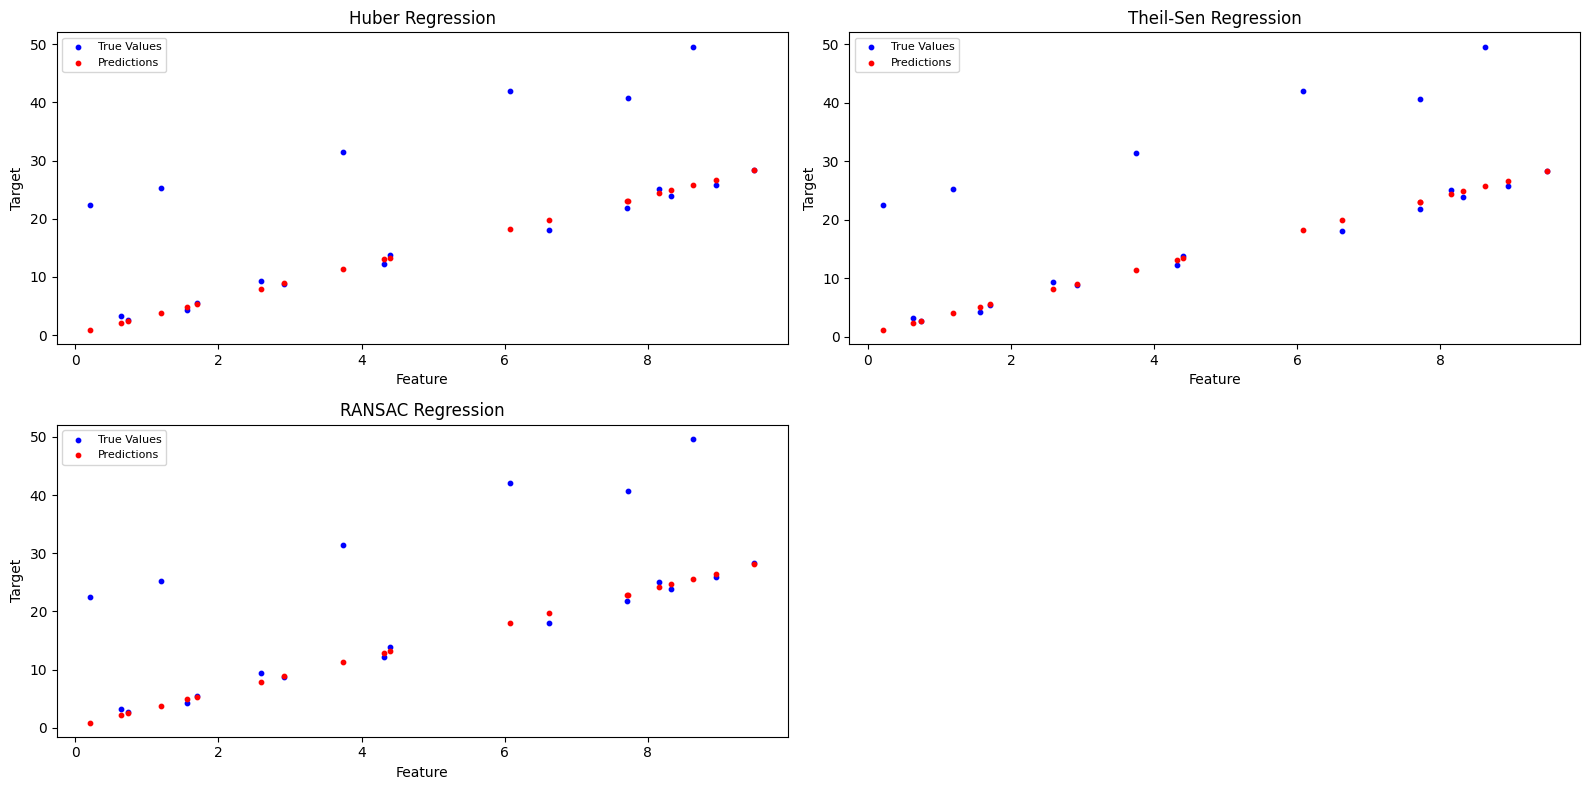

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with outliers
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + np.random.randn(100) * 2
y[::10] += 20  # Add outliers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define robust regression models
models_robust = {
    "Huber Regression": HuberRegressor(),
    "Theil-Sen Regression": TheilSenRegressor(),
    "RANSAC Regression": RANSACRegressor(),
}

# Train, predict, and evaluate models
results_robust = {}
predictions_robust = {}
for name, model in models_robust.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results_robust[name] = rmse
    predictions_robust[name] = y_pred

# Visualize RMSE
plt.figure(figsize=(12, 6))
plt.barh(list(results_robust.keys()), list(results_robust.values()), color='orange')
plt.xlabel("RMSE")
plt.title("Performance of Robust Regression Models (RMSE)")
plt.show()

# Visualize Predictions vs. True Values
plt.figure(figsize=(16, 8))
for i, (name, y_pred) in enumerate(predictions_robust.items()):
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_test, y_test, color='blue', label='True Values', s=10)
    plt.scatter(X_test, y_pred, color='red', label='Predictions', s=10)
    plt.title(name)
    plt.legend(loc="upper left", fontsize=8)
    plt.xlabel("Feature")
    plt.ylabel("Target")

plt.tight_layout()
plt.show()


**鲁棒回归模型 (Robust Regression Models)** 是针对数据中存在异常值（outliers）的回归任务设计的。这类模型在估计过程中降低了异常值的影响，能够提供更可靠的预测结果。

---

### **鲁棒回归模型分类**

#### **1. Huber Regression**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 在小误差时使用平方损失函数，大误差时切换为绝对值损失函数。
- **适用场景**:
  - 数据中存在中度异常值。
- **优缺点**:
  - **优点**: 对轻微异常值具有鲁棒性。
  - **缺点**: 对极端异常值处理能力有限。

#### **2. Theil-Sen Estimator**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 基于中位数梯度的回归方法，对异常值非常鲁棒。
- **适用场景**:
  - 数据中包含大量异常值。
- **优缺点**:
  - **优点**: 对极端异常值鲁棒性极高。
  - **缺点**: 计算较慢，不适合大规模数据。

#### **3. RANSAC Regressor (Random Sample Consensus)**
- **实现库**: Scikit-learn 提供
- **特点**:
  - 通过迭代随机采样，找到适合多数数据的模型。
- **适用场景**:
  - 数据中异常值比例较高。
- **优缺点**:
  - **优点**: 对大比例异常值非常有效。
  - **缺点**: 需要较多迭代，对模型选择敏感。

#### **4. Quantile Regression (分位数回归)**
- **实现库**: Statsmodels 提供
- **特点**:
  - 直接预测目标变量的条件分位数，而非均值。
- **适用场景**:
  - 数据分布不对称或有噪声。
- **优缺点**:
  - **优点**: 对数据分布的偏态具有鲁棒性。
  - **缺点**: 需要较多计算资源。

---

### **模型选型建议**

| **任务特点**                  | **推荐模型**                |
|-------------------------------|-----------------------------|
| 数据中存在轻微异常值          | Huber Regression           |
| 数据中存在大量异常值          | Theil-Sen Regression       |
| 异常值比例较高且分布未知      | RANSAC Regression          |
| 数据分布有偏态或噪声          | Quantile Regression        |

---

### **扩展说明**

1. **鲁棒性比较**:
   - **RANSAC** 对大比例异常值的鲁棒性最佳。
   - **Theil-Sen** 更适合处理小样本数据中随机异常值。
   - **Huber** 更适合中等规模异常值。

2. **扩展模型**:
   - **Quantile Regression** 提供更灵活的分布预测，可通过 `statsmodels` 实现。
